In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Eigen 
from sklearn.decomposition import PCA
from math import ceil

# Algos
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Image Plot (pred)
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Optimising
from sklearn.model_selection import GridSearchCV

# Scoring 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

%matplotlib inline

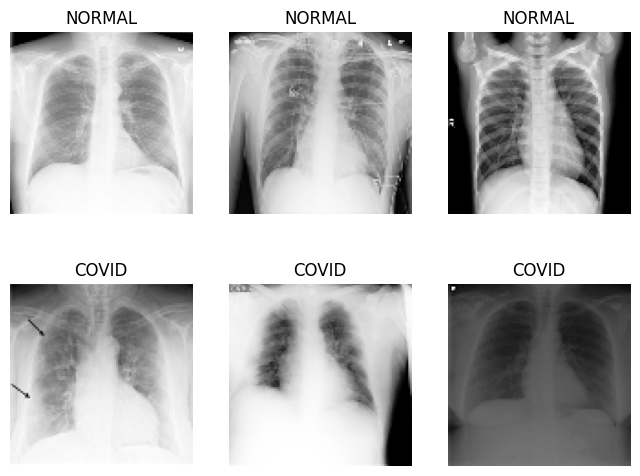

247 177


In [60]:
train_dir = 'dataset_18' # image folder

# get the list of jpgs from sub image class folders
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/normal') if fn.endswith('.png')]
covid_imgs = [fn for fn in os.listdir(f'{train_dir}/covid') if fn.endswith('.png')]

# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 3, replace = False)
select_covid = np.random.choice(covid_imgs, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/normal/{select_norm[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_dir}/covid/{select_covid[i-3]}'
        label = 'COVID'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
print(len(normal_imgs), len(covid_imgs))

In [61]:
# image as matrix
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# running it on our folders
normal_images = img2np(f'{train_dir}/normal/', normal_imgs)
covid_images = img2np(f'{train_dir}/covid/', covid_imgs)

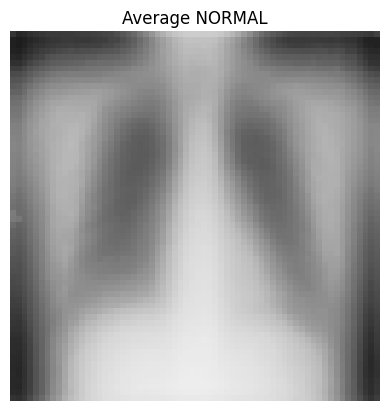

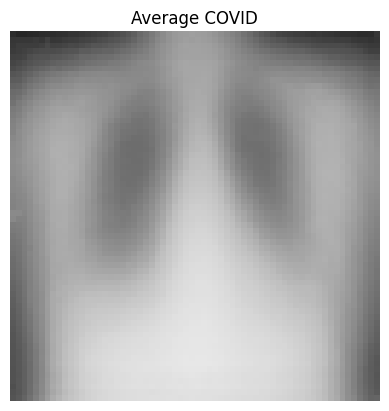

In [62]:
# Average Image value of each pixel
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'NORMAL')
covid_mean = find_mean_img(covid_images, 'COVID')

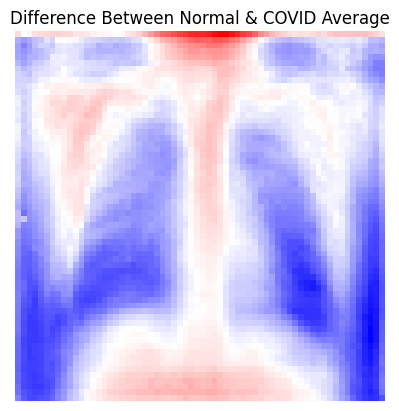

In [63]:
# Contrast Between Average Images
contrast_mean = norm_mean - covid_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & COVID Average')
plt.axis('off')
plt.show()

Normal
Number of PC:  9


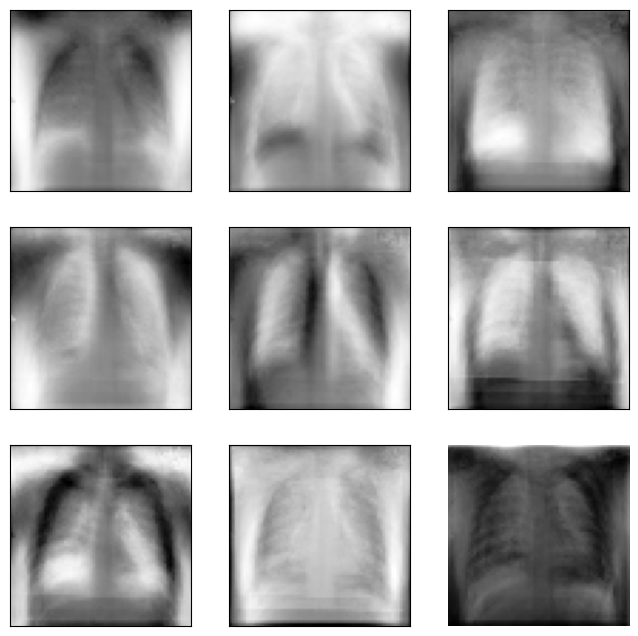


Covid
Number of PC:  8


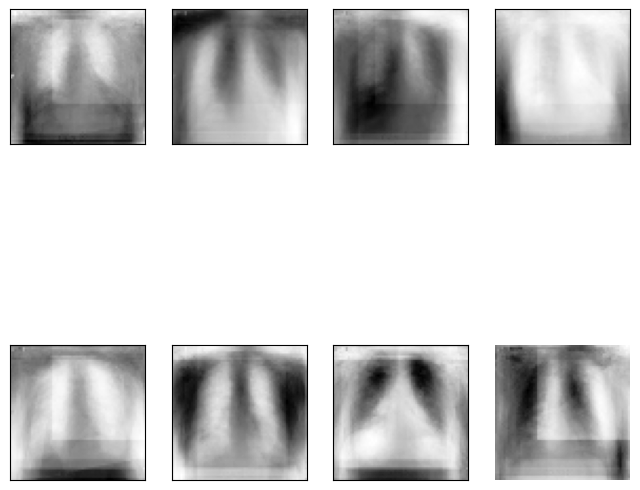

In [64]:
# Eigenimages
def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()

print("Normal")
plot_pca(eigenimages(normal_images, 'NORMAL'))

print("\nCovid")
plot_pca(eigenimages(covid_images, 'COVID'))
